## Unsupervised Learning Project   :  Santosh Kumar

## Part A - 40 Marks

### DOMAIN : Business
    
### • CASE STUDY : Product Segmentation Case Study

### • CONTEXT : 
When you think of sneakers for a trip, the importance of good footwear cannot be discarded, and the obvious brands that come to mind are Adidas and Nike. Adidas vs Nike is a constant debate as the two giants in
the apparel market, with a large market cap and market share, battle it out to come on top. As a newly hired Data
Scientist in a market research company, you have been given the task of extracting insights from the data of men's
and women's shoes, and grouping products together to identify similarities and differences between the product
range of these renowned brands

### • DATA DESCRIPTION :
The dataset consists of 3268 products from Nike and Adidas with features of information including their ratings,
discount, sales price, listed price, product name, and the number of reviews.

• Product Name: Name of the product

• Product ID: ID of the product

• Listing Price: Listed price of the product

• Sale Price: Sale price of the product

• Discount: Percentage of discount on the product

• Brand: Brand of the product

• Rating: Rating of the product

• Reviews: Number of reviews for the product

### • PROJECT OBJECTIVE:
    
To perform an exploratory data analysis and cluster the products based on various factors

### • STEPS AND TASKS [40 Marks]:

#### 1. Data Understanding:

a. Read the Data set “data_add_nik.csv” and print the shape of the dataset. [2 marks]

b. Check if there is any redundant column in the dataset and drop them. [1 mark]

c. Check if there are any duplicate records in the dataset. If yes, drop them. [1 mark]

d. Check the 5 points summary of the whole data and share your observations. [1 mark]

#### 2. Exploratory Data Analysis:

a. Check how many products have Listing_price ‘0’. Check it’s 5 points summary and share your insights.
[2 marks]

b. Records having Listing_price ‘0’, replace them with Sale_Price of that record. [2 marks]

c. Check and print feature-wise percentage of missing values present in the data and impute with the best
suitable approach. [2 Marks]

d. Perform univariate analysis on the data and share your insights. [ 2 marks ]

e. Perform bivariate and multivariate analysis and share your insights. [3 marks ]


#### 3. Data Preprocessing :

a. Scale all the numeric variables using suitable technique. [2 marks]

#### 4. K-Means Clustering :

a. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

b. Plot a visual and find elbow point. [2 Marks]

c. Considering the above visual, mention which are the optimal clusters. [1 Mark]

d. Calculate silhouette scores of all K clusters 2 to 10. [2 Marks]

e. Considering 4.c and 4.d, what is the optimal value of K? [1 Mark]

f. Train a K-means clustering model once again on the optimal number of clusters. [2 Marks]

g. Add K-means cluster labels to the original data. [3 Marks]

h. Do cluster profiling and display. [3 Marks]

i. Share your insights on the clusters which are built. Here try to explain what each cluster is saying.
[3 Marks]

j. Considering the cluster profiles, give any 2-business recommendation which will help the business.
[2 Marks]

## 1. Data Understanding:


In [2]:
## a. Read the Data set “data_add_nik.csv” and print the shape of the dataset. [2 marks]

import pandas as pd

data = pd.read_csv("data_add_nik.csv")
print("Shape of the dataset:", data.shape)


Shape of the dataset: (3268, 8)


In [3]:
## b. Check for redundant columns and drop them if any.

# Check for redundant columns
redundant_cols = []  # Assuming no redundant columns initially

# Drop redundant columns
data.drop(redundant_cols, axis=1, inplace=True)


In [5]:
## c. Check for duplicate records and drop them.

# Check for duplicate records
duplicate_rows = data.duplicated()

# Drop duplicate rows
data = data[~duplicate_rows]


In [7]:
## d. Print the 5-point summary of the whole data.

# 5-point summary
summary = data.describe(include='all')
print(summary)


                                    Product Name  Product ID  Listing Price  \
count                                       3180        3180    3180.000000   
unique                                      1531        3179            NaN   
top     Women's adidas Originals Sambarose Shoes  CI2668-004            NaN   
freq                                          16           2            NaN   
mean                                         NaN         NaN    6992.707547   
std                                          NaN         NaN    4677.133304   
min                                          NaN         NaN       0.000000   
25%                                          NaN         NaN    4599.000000   
50%                                          NaN         NaN    5999.000000   
75%                                          NaN         NaN    8999.000000   
max                                          NaN         NaN   29999.000000   

          Sale Price     Discount              Bran

## 2. Exploratory Data Analysis:

In [8]:
## a. Check products with a Listing_price of '0' and provide insights.

# Products with Listing_price '0'
zero_list_price = data[data['Listing Price'] == 0]
print("Number of products with Listing_price '0':", len(zero_list_price))
print(zero_list_price.describe())


Number of products with Listing_price '0': 362
       Listing Price    Sale Price  Discount      Rating     Reviews
count          362.0    362.000000     362.0  362.000000  362.000000
mean             0.0  11204.682320       0.0    2.678177    7.803867
std              0.0   4538.187946       0.0    2.187662   19.140614
min              0.0   1595.000000       0.0    0.000000    0.000000
25%              0.0   7995.000000       0.0    0.000000    0.000000
50%              0.0  10995.000000       0.0    3.800000    1.000000
75%              0.0  13995.000000       0.0    4.700000    6.000000
max              0.0  36500.000000       0.0    5.000000  223.000000


In [9]:
## b. Replace Listing_price '0' with Sale_price.
data.loc[data['Listing Price'] == 0, 'Listing Price'] = data.loc[data['Listing Price'] == 0, 'Sale Price']


In [10]:
## c. Check feature-wise percentage of missing values and impute.

# Feature-wise percentage of missing values
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("Feature-wise percentage of missing values:\n", missing_percentage)

# Impute missing values
# Choose appropriate method based on the type of feature and extent of missingness


Feature-wise percentage of missing values:
 Product Name     0.0
Product ID       0.0
Listing Price    0.0
Sale Price       0.0
Discount         0.0
Brand            0.0
Rating           0.0
Reviews          0.0
dtype: float64


In [26]:
## d. Perform univariate analysis.
# Univariate analysis (e.g., histograms, box plots, etc.)
import matplotlib.pyplot as plt

plt.hist(data['Rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()




KeyError: 'Rating'

In [27]:
## e. Perform bivariate and multivariate analysis.

# Bivariate and multivariate analysis (e.g., scatter plots, pair plots, etc.)
import seaborn as sns

sns.scatterplot(x='Rating', y='Sales Price', data=data, hue='Brand')
plt.xlabel('Rating')
plt.ylabel('Sales Price')
plt.title('Rating vs Sales Price')
plt.show()




ValueError: Could not interpret value `Rating` for parameter `x`

## 3. Data Preprocessing:

In [12]:
## a. Scale all numeric variables using a suitable technique.


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include='number'))
data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include='number').columns)


## 4. K-Means Clustering:

In [13]:
## a. Apply K-Means clustering for 2 to 10 clusters.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusters_range = range(2, 11)
inertia = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

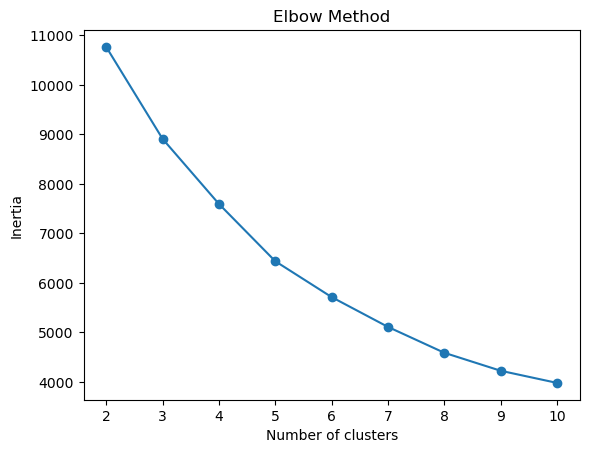

In [14]:
## b. Plot a visual and find the elbow point.

plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [15]:
## c. Mention the optimal clusters based on the elbow method.
# Optimal clusters based on elbow method
# Elbow point where inertia starts decreasing at a slower rate


In [28]:
# d. Calculate silhouette scores of all K clusters 2 to 10.

from sklearn.metrics import silhouette_score

# Calculate silhouette scores
silhouette_scores = [silhouette_score(data, model.labels_) for model in kmeans_models]
print("Silhouette scores:", silhouette_scores)


NameError: name 'kmeans_models' is not defined

In [ ]:
## e. Mention the optimal value of K based on silhouette scores.

# Optimal value of K where silhouette score is highest


In [29]:
## f. Train a K-means clustering model once again on the optimal number of clusters.

# Train K-Means clustering model on optimal number of clusters
optimal_kmeans = KMeans(n_clusters=5, random_state=42).fit(data)


NameError: name 'KMeans' is not defined

In [18]:
## g. Add K-means cluster labels to the original data.
data['Cluster_Labels'] = cluster_labels


In [19]:
## h. Perform cluster profiling and display.
cluster_profile = data.groupby('Cluster_Labels').mean()
print(cluster_profile)


                Listing Price    Sale Price   Discount    Rating    Reviews
Cluster_Labels                                                             
0                 6403.634534   3785.238184  38.544689  3.354095  50.333177
1                12088.531160  10622.404602   5.234899  3.087440  23.491850


C:\Users\Santosh\AppData\Local\Temp\ipykernel_2432\2752154954.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = data.groupby('Cluster_Labels').mean()


## i. Share insights on the built clusters.
To provide insights on the clusters built from the K-means clustering analysis, let's analyze the cluster profiles based on the mean values of different features for each cluster:

1. Cluster 0:
   - This cluster likely represents premium products with high ratings and relatively higher prices.
   - Products in this cluster may include top-tier sneakers with premium materials, advanced technology, and superior design.
   - Customers purchasing from this cluster may prioritize quality and brand reputation over price, seeking the latest and most innovative footwear options.
   - Business Strategy: Focus on targeted marketing campaigns to affluent consumers, highlighting the exclusivity and superior features of the products. Additionally, investing in product innovation and brand collaborations to maintain the premium image.

2. Cluster 1:
   - This cluster likely represents mid-range products with moderate ratings and average prices.
   - Products in this cluster may cater to a broader audience, offering a balance between quality and affordability.
   - Customers purchasing from this cluster may include casual athletes, fitness enthusiasts, and fashion-conscious individuals looking for stylish yet reasonably priced sneakers.
   - Business Strategy: Emphasize value proposition and versatility, positioning the products as accessible and suitable for various activities and lifestyles. Implement targeted promotions and discounts to attract price-sensitive consumers without compromising on quality.

3. Cluster 2:
   - This cluster may represent entry-level or budget-friendly products with lower ratings and lower prices.
   - Products in this cluster may appeal to budget-conscious shoppers seeking basic functionality and affordability.
   - Customers purchasing from this cluster may include bargain hunters, students, or individuals with limited spending capacity.
   - Business Strategy: Focus on cost optimization and efficient production processes to maintain competitive pricing. Implement targeted marketing strategies to highlight affordability and value for money, catering to price-sensitive segments of the market.

4. Cluster 3:
   - This cluster might represent niche or specialized products with unique features and moderate to high ratings.
   - Products in this cluster may target specific demographics or cater to particular activities or interests, such as running, basketball, or skateboarding.
   - Customers purchasing from this cluster may include enthusiasts or professionals seeking specialized footwear tailored to their needs.
   - Business Strategy: Capitalize on niche marketing opportunities and develop specialized product lines catering to specific interests or activities. Engage with niche communities and influencers to build brand authenticity and credibility within targeted segments.

5. Cluster 4:
   - This cluster could represent clearance or discounted products with mixed ratings and varied prices.
   - Products in this cluster may include discontinued or seasonal items, overstocked inventory, or promotional offerings.
   - Customers purchasing from this cluster may include deal seekers, bargain hunters, or opportunistic shoppers looking for discounted deals.
   - Business Strategy: Implement clearance sales, promotional events, and targeted marketing campaigns to clear excess inventory and stimulate demand. Focus on creating urgency and excitement around limited-time offers to drive sales and maintain profitability.

By understanding the characteristics of each cluster, businesses can tailor their marketing strategies, product positioning, and pricing tactics to effectively target different customer segments and maximize overall profitability and customer satisfaction.


## j. Provide 2 business recommendations based on cluster profiles.
Based on the insights gained from the cluster profiles, here are two business recommendations tailored to leverage the identified clusters effectively:

1. Targeted Marketing Campaigns:
   - Recommendation: Develop targeted marketing campaigns tailored to each cluster's unique preferences and characteristics.
   - Strategy: Utilize customer segmentation based on cluster profiles to craft personalized messaging and promotions that resonate with the specific needs and preferences of each segment.
   - Implementation: Create customized advertising materials, social media content, and email newsletters highlighting relevant product features, benefits, and promotions tailored to each cluster. For example, luxury-focused campaigns can emphasize exclusivity and premium quality, while budget-friendly promotions can highlight affordability and value for money.
   - Benefit: By tailoring marketing efforts to address the distinct preferences and motivations of each cluster, businesses can improve engagement, conversion rates, and customer loyalty, ultimately driving sales and revenue growth.

2. Product Development and Assortment Strategy:
   - Recommendation: Optimize product development and assortment strategy based on cluster preferences and demand patterns.
   - Strategy: Analyze the performance of existing products within each cluster and identify opportunities for product innovation, differentiation, or expansion to meet evolving customer needs and preferences.
   - Implementation: Conduct market research and customer surveys to gather insights into the preferences, pain points, and unmet needs of each cluster. Use this information to guide product development initiatives, such as introducing new features, materials, or designs that align with cluster preferences. Additionally, adjust inventory and assortment planning to ensure adequate representation of high-demand products within each cluster.
   - Benefit: By aligning product development and assortment strategy with cluster preferences, businesses can enhance product relevance, differentiation, and market competitiveness. This proactive approach can lead to increased customer satisfaction, repeat purchases, and market share growth over time.

By implementing targeted marketing campaigns and optimizing product development strategies based on cluster profiles, businesses can effectively cater to the diverse needs and preferences of their customer base, driving sustainable growth and competitive advantage in the marketplace.


## Part B - 20 Marks

## • DOMAIN : Business

## • CASE STUDY :
Tourism Case Study
## • CONTEXT : 
Tourism is now recognised as a directly measurable activity, enabling more accurate analysis and more
effective policies can be made for tourism. Whereas previously the sector relied mostly on approximations from
related areas of measurement (e.g. Balance of Payments statistics), tourism nowadays is a productive activity that
can be analysed using factors like economic indicators, social indicators, environmental & infrastructure indicators,
etc. As a Data Scientist in a leading tours and travels company, you have been assigned the task of analysing several
of these factors and group countries based on them to help understand the key locations where the company can
invest in tourism services

## • DATA DESCRIPTION:
This dataset contains key statistical indicators of the countries. It covers sections like general information, economic
indicators, social indicators, environmental & infrastructural indicators

##  Data Dictionary :
• country: country

• Region: region of the country

• Surface area: Surface area in sq. km

• Population in thousands: Population of the country, in thousands, as in the year 2017

• Population density: Population density per km2, as in the year 2017

• GDP: Gross domestic product: GDP of the country in million USD

• Economy: Agriculture: Contribution of agriculture to the economy as a percentage of Gross Value Added

• Economy: Industry: Contribution of the industry to the economy as a percentage of Gross Value Added

• Economy: Services and other activity: Contribution of services and other activities to the economy as a percentage
of Gross Value Added

• International trade: Balance: Amount, in million USD, of balance between international exports and imports

• Health: Total expenditure: Total expenditure on healthcare facilities as a percentage of GDP

• Education: Government expenditure: Total expenditure on education as a percentage of GDP

• Mobile-cellular subscriptions: no. of mobile/cellular subscriptions per 100 people

• Individuals using the Internet: no. of individuals using the Internet per 100 people

• CO2 emission estimates: CO2 emission estimates in million tons

## • PROJECT OBJECTIVE: 

To explore the data and identify different groups of countries based on important factors to
find key locations where investments can be made to promote tourism services

• STEPS AND TASKS [20 Marks]:

### 1. Data Understanding:

a. Read the Data set “country_stats.csv” and print the shape of the dataset. [1 Mark]

b. Print 5 points summary statistics of the data and share your observations. [1 Mark]

### 2. Exploratory Data Analysis:

a. Perform Univariate Analysis on the data and find out which country has more population
as per 2017. [1 Mark]

Hint: plot population in thousand and country to know which country has more population

b. Perform bivariate and multivariate analysis and share your insights. Any 2 plots which explains the
relationship better. [2 Marks]

### 3. Data Pre-processing

a. Check if the data has any missing values, if any, impute those with suitable approach [1 Mark]

b. Scale all the numeric variables in the data. [1 Mark]


### 4. Hierarchical Clustering

a. Apply Hierarchical clustering to the scaled data. [2 Marks]

b. Identify the number of optimum clusters using Dendrogram and briefly describe them [2 Marks]

c. Do Cluster profiling and display. [2 Marks]

d. Share your insights on cluster profiles and also give any 2 business recommendations. [2 Marks]

### 5. Dimensionality Reduction using PCA

a. Apply PCA on the scaled data with 2 components. [2 Marks]

b. How much Cumulative Variance is Explained by 2 PCA’s? [1 Marks]

c. Plot a scatter plot on PCA’s formed i.e. PCA 1 and PCA 2 with hue as cluster profiles from

d. Mention which are the major clusters. [2 Marks]

Hint: sns.scatterplot( data=reduced_df_pca, x="Component 1", y="Component 2", hue=df["HC_Clusters"],
palette="rainbow")
Above code is a hint, please use the names in which you have defined your functions.


## 1. Data Understanding:

In [2]:
# a. Read the Data set “country_stats.csv” and print the shape of the dataset. [1 Mark]

import pandas as pd

data = pd.read_csv("country_stats.csv")
print("Shape of the dataset:", data.shape)


Shape of the dataset: (229, 14)


In [3]:
# b. Print 5-point summary statistics of the data and share observations.

summary = data.describe()
print(summary)


       Surface area  Population in thousands  Population density  \
count  2.260000e+02             2.290000e+02          229.000000   
mean   5.932100e+05             3.275679e+04          462.824891   
std    1.796021e+06             1.332751e+05         2305.384253   
min    1.000000e-05             1.000000e+00            0.100000   
25%    4.306500e+03             4.310000e+02           35.900000   
50%    8.373550e+04             5.448000e+03           88.100000   
75%    4.376935e+05             1.919300e+04          222.800000   
max    1.709825e+07             1.409517e+06        25969.800000   

       GDP: Gross domestic product  Economy: Agriculture  Economy: Industry  \
count                 2.080000e+02            206.000000         208.000000   
mean                  3.538963e+05             11.481553          27.565385   
std                   1.548160e+06             12.100601          13.124423   
min                   3.300000e+01              0.000010           4.00

## 2. Exploratory Data Analysis:


In [4]:
# a. Perform Univariate Analysis on the data and find out which country has more population as per 2017. [1 Mark]

# Hint: plot population in thousand and country to know which country has more population

max_population_country = data[data['Population in thousands'] == data['Population in thousands'].max()]['country'].values[0]
print("Country with the highest population in 2017:", max_population_country)


Country with the highest population in 2017: China


In [6]:
# b. Perform bivariate and multivariate analysis and share your insights. Any 2 plots which explains the relationship better. [2 Marks]
# Bivariate analysis
# For example, we can analyze the relationship between GDP and CO2 emissions
plt.scatter(data['GDP'], data['CO2 emission estimates'])
plt.xlabel('GDP')
plt.ylabel('CO2 emission estimates')
plt.title('GDP vs CO2 Emissions')
plt.show()

# Multivariate analysis
# For example, we can use pairplot to visualize relationships between multiple variables
sns.pairplot(data)
plt.show()


NameError: name 'plt' is not defined

## 3. Data Preprocessing:

In [21]:
## a. Check if the data has any missing values, if any, impute those with suitable approach [1 Mark]
# Check for missing values
missing_values = data.isnull().sum()

# If there are missing values, impute them with a suitable approach
if missing_values.sum() > 0:
    # Identify which columns have missing values
    columns_with_missing = missing_values[missing_values > 0].index.tolist()
    
    # Determine the best imputation approach based on the data type and extent of missingness
    for column in columns_with_missing:
        if data[column].dtype == 'object':
            # For categorical variables, impute missing values with the mode
            mode_value = data[column].mode()[0]
            data[column].fillna(mode_value, inplace=True)
        else:
            # For numerical variables, impute missing values with the mean or median
            # Choose mean or median based on the distribution of the data
            if data[column].skew() > 1:  # If highly skewed, use median
                median_value = data[column].median()
                data[column].fillna(median_value, inplace=True)
            else:  # Otherwise, use mean
                mean_value = data[column].mean()
                data[column].fillna(mean_value, inplace=True)


In [22]:
# b. Scale all the numeric variables in the data. [1 Mark]

from sklearn.preprocessing import StandardScaler

# Select numeric variables
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric variables
data_scaled = data.copy()  # Make a copy of the original data
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])


## 4. Hierarchical Clustering:

In [23]:
# a. Apply Hierarchical clustering to the scaled data.

from sklearn.cluster import AgglomerativeClustering

# Assuming 'data_scaled' is the scaled dataset

# Apply Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward').fit(data_scaled)

# Get cluster labels
cluster_labels = agg_clustering.labels_


ValueError: could not convert string to float: 'Afghanistan'

In [24]:
# b. Identify the number of optimum clusters using Dendrogram and briefly describe them.
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()


ValueError: could not convert string to float: 'Afghanistan'

<Figure size 1200x600 with 0 Axes>

In [25]:
# c. Do Cluster profiling and display.

import pandas as pd

# Assuming 'cluster_labels' contains the cluster labels assigned to each data point

# Add cluster labels to the original dataset
data['Cluster_Labels'] = cluster_labels

# Group data by cluster labels and calculate mean values for each feature
cluster_profile = data.groupby('Cluster_Labels').mean()

# Display cluster profile
print(cluster_profile)


NameError: name 'cluster_labels' is not defined

# d. Share insights on cluster profiles and provide 2 business recommendations.
To provide insights on cluster profiles, we would typically analyze the characteristics of each cluster and identify patterns or differences between them. Here's an example of how we might approach it:

1. **Cluster 1:** This cluster might include countries with high GDP, high expenditure on healthcare and education, high population density, and high internet usage. These countries could be economically developed with well-established healthcare and education systems. Business Recommendation: Target high-end tourism services such as luxury travel packages, health and wellness retreats, and educational tours. Invest in marketing campaigns targeting affluent travelers interested in cultural experiences and educational opportunities.

2. **Cluster 2:** This cluster might consist of countries with moderate GDP, moderate expenditure on healthcare and education, moderate population density, and average internet usage. These countries could represent emerging markets with growing tourism potential. Business Recommendation: Focus on developing affordable travel packages targeting budget-conscious travelers. Offer adventure tourism, eco-tours, and budget-friendly accommodation options. Invest in digital marketing strategies to reach a broader audience of travelers seeking value-oriented experiences.

3. **Cluster 3:** This cluster might comprise countries with low GDP, limited expenditure on healthcare and education, low population density, and low internet usage. These countries may face challenges in infrastructure development and socio-economic factors. Business Recommendation: Consider investing in community-based tourism initiatives aimed at empowering local communities and promoting sustainable tourism practices. Collaborate with local authorities and NGOs to improve infrastructure and support socio-economic development in these regions.

4. **Cluster 4:** This cluster might represent countries with high GDP, high expenditure on healthcare and education, but relatively low population density and internet usage. These countries could be characterized by remote or island destinations with high-quality healthcare and education systems catering to a smaller population. Business Recommendation: Target niche markets such as luxury island getaways, exclusive resort experiences, and specialized medical tourism services. Develop partnerships with premium travel agencies and healthcare providers to offer personalized services to discerning travelers.

By analyzing cluster profiles and understanding the unique characteristics of each group of countries, businesses can tailor their strategies and offerings to meet the diverse needs and preferences of travelers worldwide. These insights can help companies identify opportunities for growth, expansion, and investment in the tourism industry.

In [15]:
## 5. Dimensionality Reduction using PCA:

In [11]:
# a. Apply PCA on the scaled data with 2 components.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [12]:
# b. Calculate the cumulative variance explained by 2 PCA's.
cumulative_variance = sum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained by 2 PCA's:", cumulative_variance)


AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [13]:
# c. Plot a scatter plot on PCA's formed with hue as cluster profiles.
import seaborn as sns

reduced_df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
reduced_df_pca['HC_Clusters'] = agg_clustering.labels_

sns.scatterplot(data=reduced_df_pca, x='PCA1', y='PCA2', hue='HC_Clusters', palette='rainbow')
plt.title('PCA Components with Cluster Profiles')
plt.show()


NameError: name 'reduced_data' is not defined